### Week6 Homework

The wavelet function is:
$$
\phi_{a, t_0}(t) = R_a(t - t_0) = R_a(t_0 - t).
$$

And the coefficents by wavelet transform are:
$$
T(a, t_0) = \int_{-\infty}^{+\infty} x(t)  \phi_{a, t_0}(t) dt = \int_{-\infty}^{+\infty} x(t)  R_a(t_0 - t) dt.
$$
Then we use convolution theorem to further transform the above equtation:
$$
T(a, t_0) = \mathscr{F}^{-1} \left( \mathscr{F}(x(t)) \cdot \mathscr{F}(R_a(t)) \right).
$$
Then when applying the FFT, the complexity should be of $O(N \log{N})$ for each frequency $a$.

In [3]:
N = 5000
brain_signal = sin.(LinRange(0, 1000, N) ./ 10) .+ rand(N)

5000-element Vector{Float64}:
  0.7290342965527349
  0.6703816431050201
  0.8955362358165948
  1.030781192802639
  0.4379656673018454
  0.9656259835341491
  0.7468835538979409
  0.47123886570848383
  0.48602911223835443
  1.012435473543948
  ⋮
 -0.20893622183070382
 -0.03640059278992247
 -0.3355955932521335
  0.11327717146305549
 -0.4976782144622397
  0.1866196373917145
  0.18942891466334366
 -0.4863072620991271
  0.3000891483030107

In [2]:
function ricker(x, a)
	A = 8/π/sqrt(3a)
	return A * (1 - (x/a)^2) * exp(-x^2/a^2/2)
end

ricker (generic function with 1 method)

In [5]:
using FFTW
function wavelet_transformation(signal::AbstractVector{T}, fw) where T
    M = length(signal)
    N = length(fw)

    signal_pad = [signal; zeros(N - 1)]
    fw_pad = [fw; zeros(M - 1)]

    resulting_vector = ifft(fft(signal_pad) .* fft(fw_pad))

    return abs.(resulting_vector)
end

wavelet_transformation (generic function with 1 method)

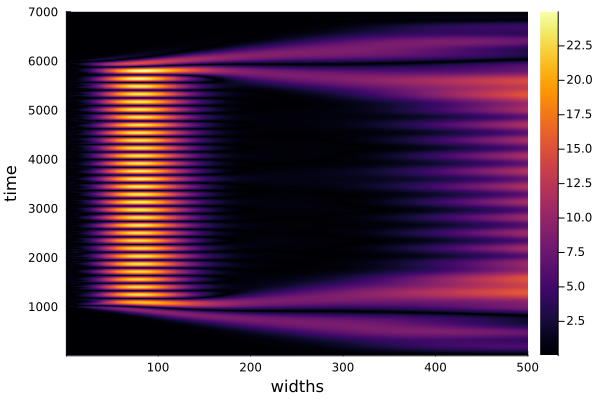

In [10]:
using Plots

let
	# the width parameter `a` in the Ricker wavelet is 1..500
	widths = 1:N÷10
	res = []
	for (j, a) in enumerate(widths)
		fw = ricker.(-1000:1000, a)   # the descretized wavelet of width `a`
		res_a = wavelet_transformation(brain_signal, fw)
		push!(res, res_a)
	end
	res[1][1]
	plot = heatmap(hcat(res...); ylabel="time", xlabel="widths")
	# savefig(plot,"wavelet.png")
end

The input data is a sin function with some noises. And most frequencies in the figure above are on the left. The right part corresponding to the noise in the input data.

#### Credits to Xuanzhao Gao